In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
from pylab import rcParams
import seaborn as sns; sns.set(style="ticks", color_codes=True)
rcParams['figure.figsize'] = 15, 10
warnings.simplefilter('ignore')
from yellowbrick.model_selection.importances import FeatureImportances
from sklearn.linear_model import Lasso
from yellowbrick.target import BalancedBinningReference
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from yellowbrick.model_selection import CVScores
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import LassoCV
from yellowbrick.datasets import load_concrete

In [5]:
X,y= load_concrete()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cement  1030 non-null   float64
 1   slag    1030 non-null   float64
 2   ash     1030 non-null   float64
 3   water   1030 non-null   float64
 4   splast  1030 non-null   float64
 5   coarse  1030 non-null   float64
 6   fine    1030 non-null   float64
 7   age     1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


In [10]:
df=pd.concat([X,y],axis=1)

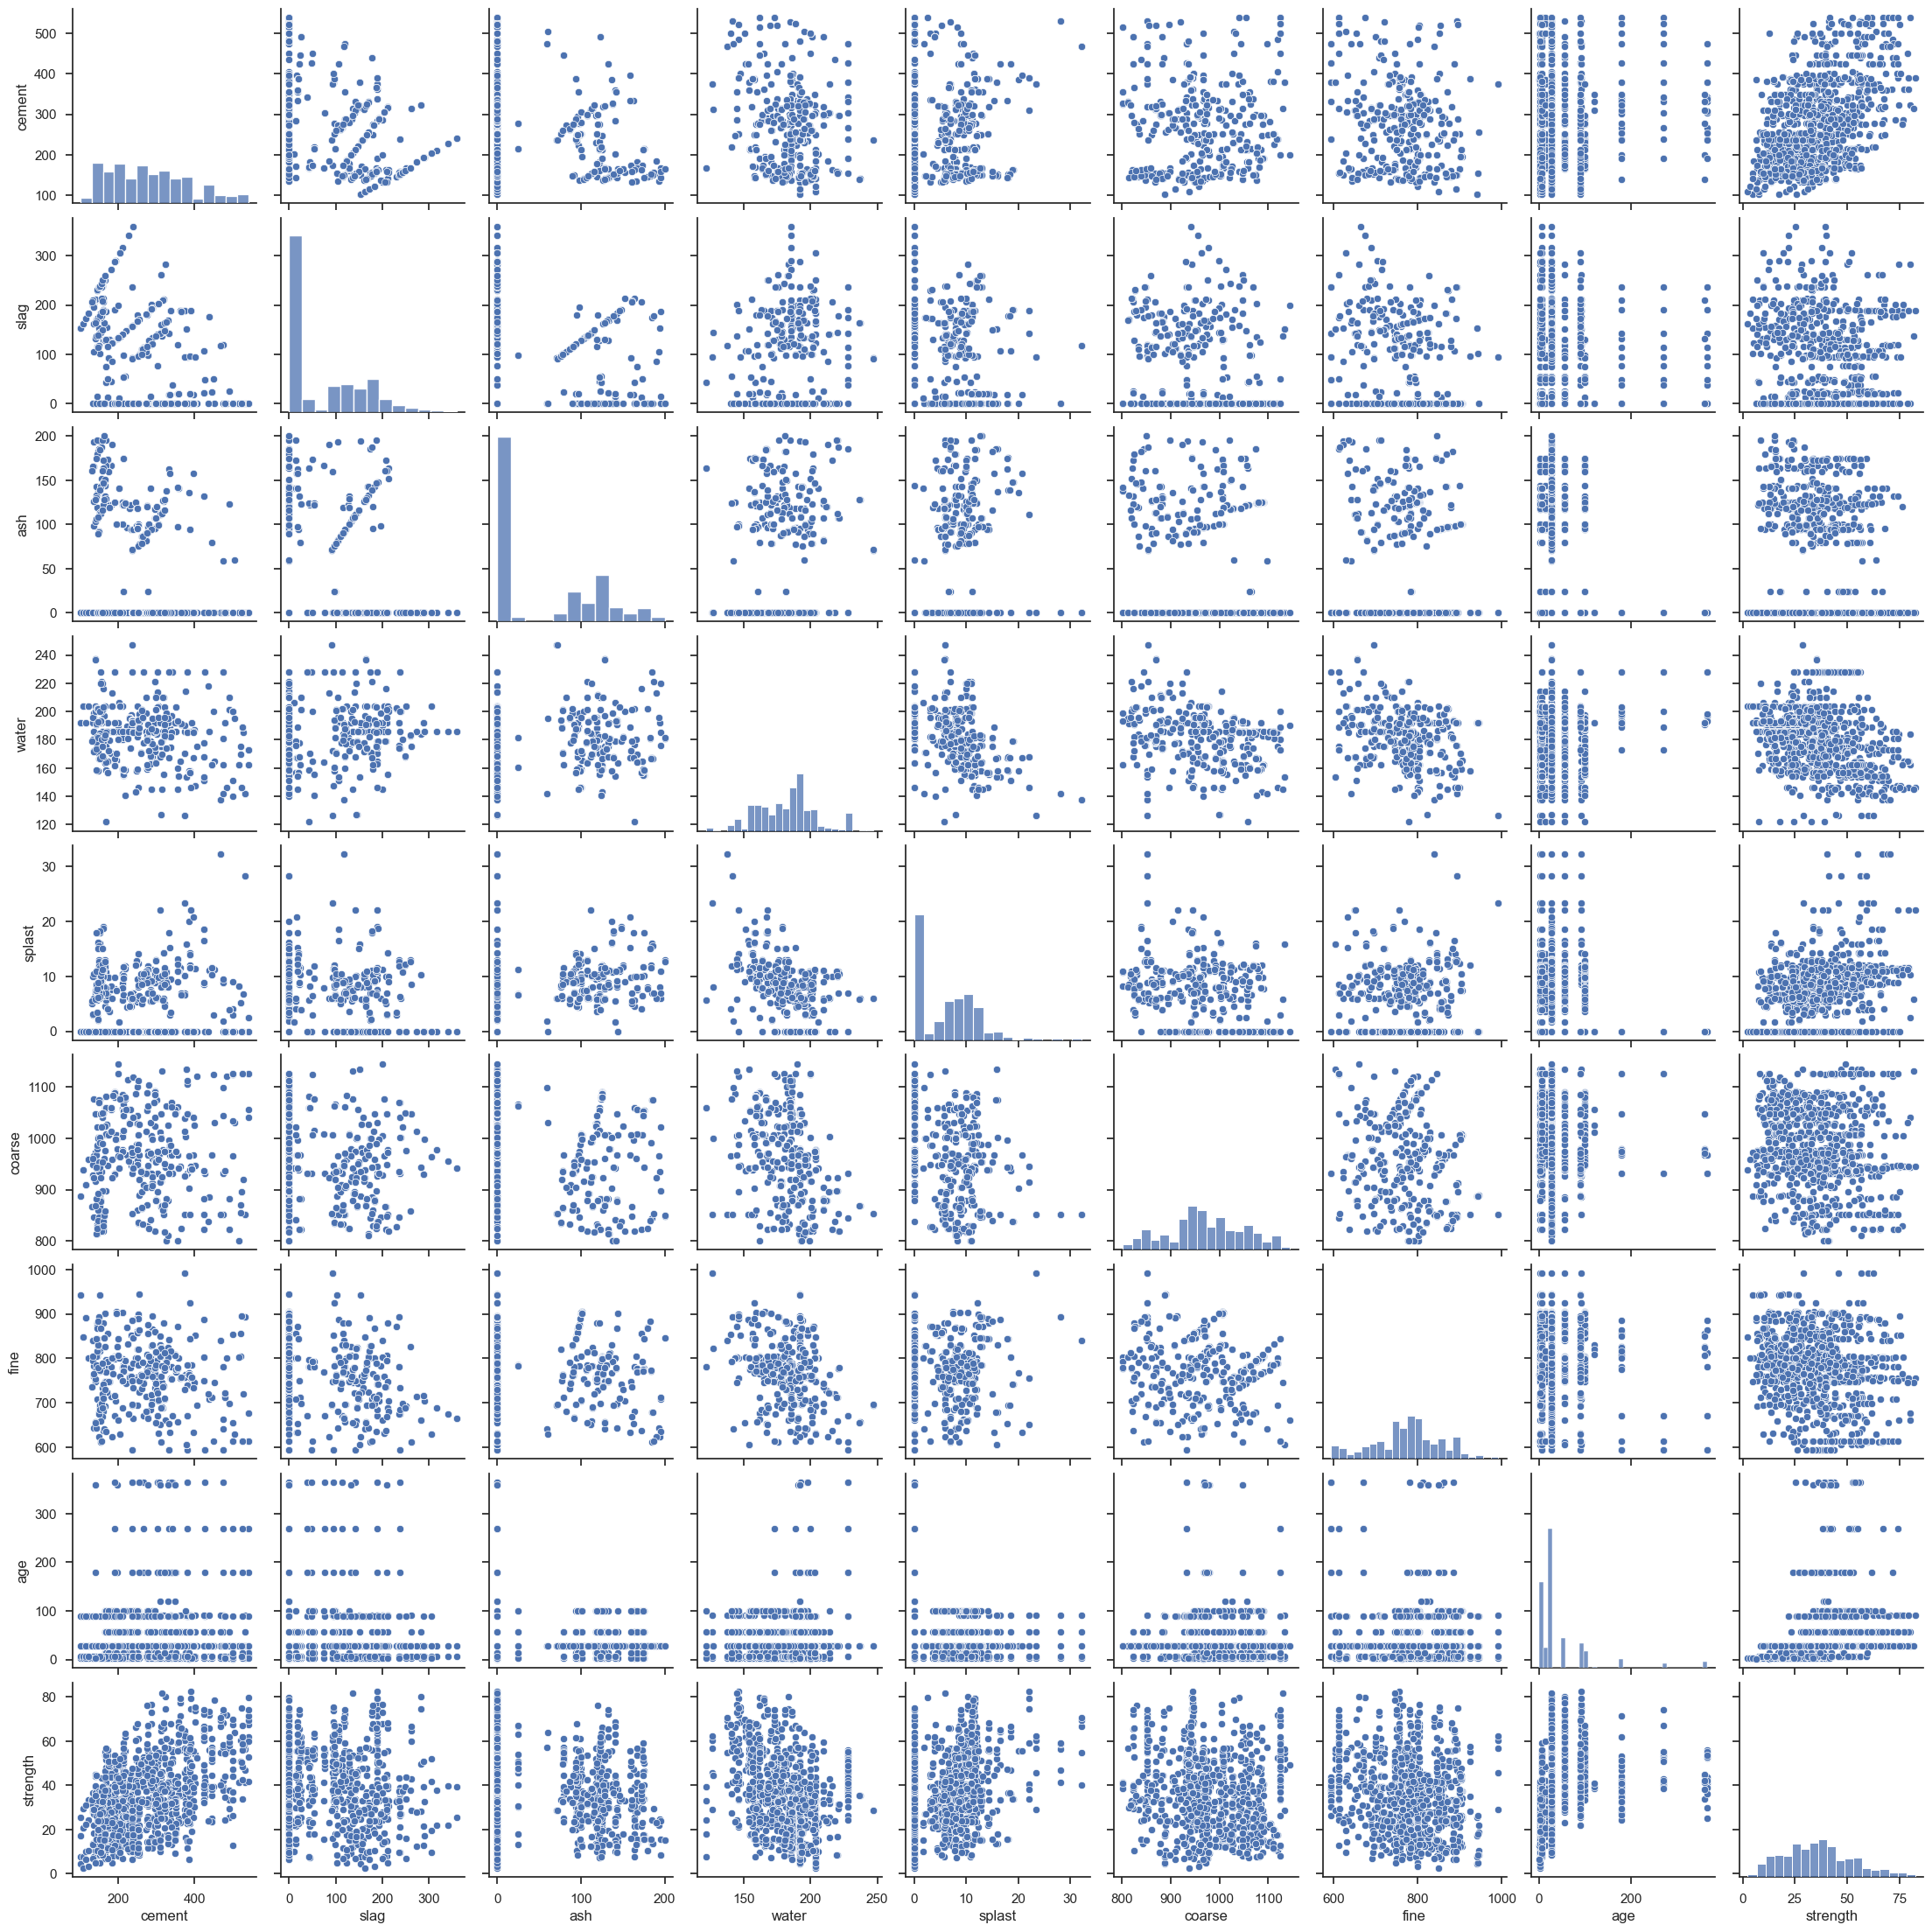

In [11]:
sns.pairplot(df)

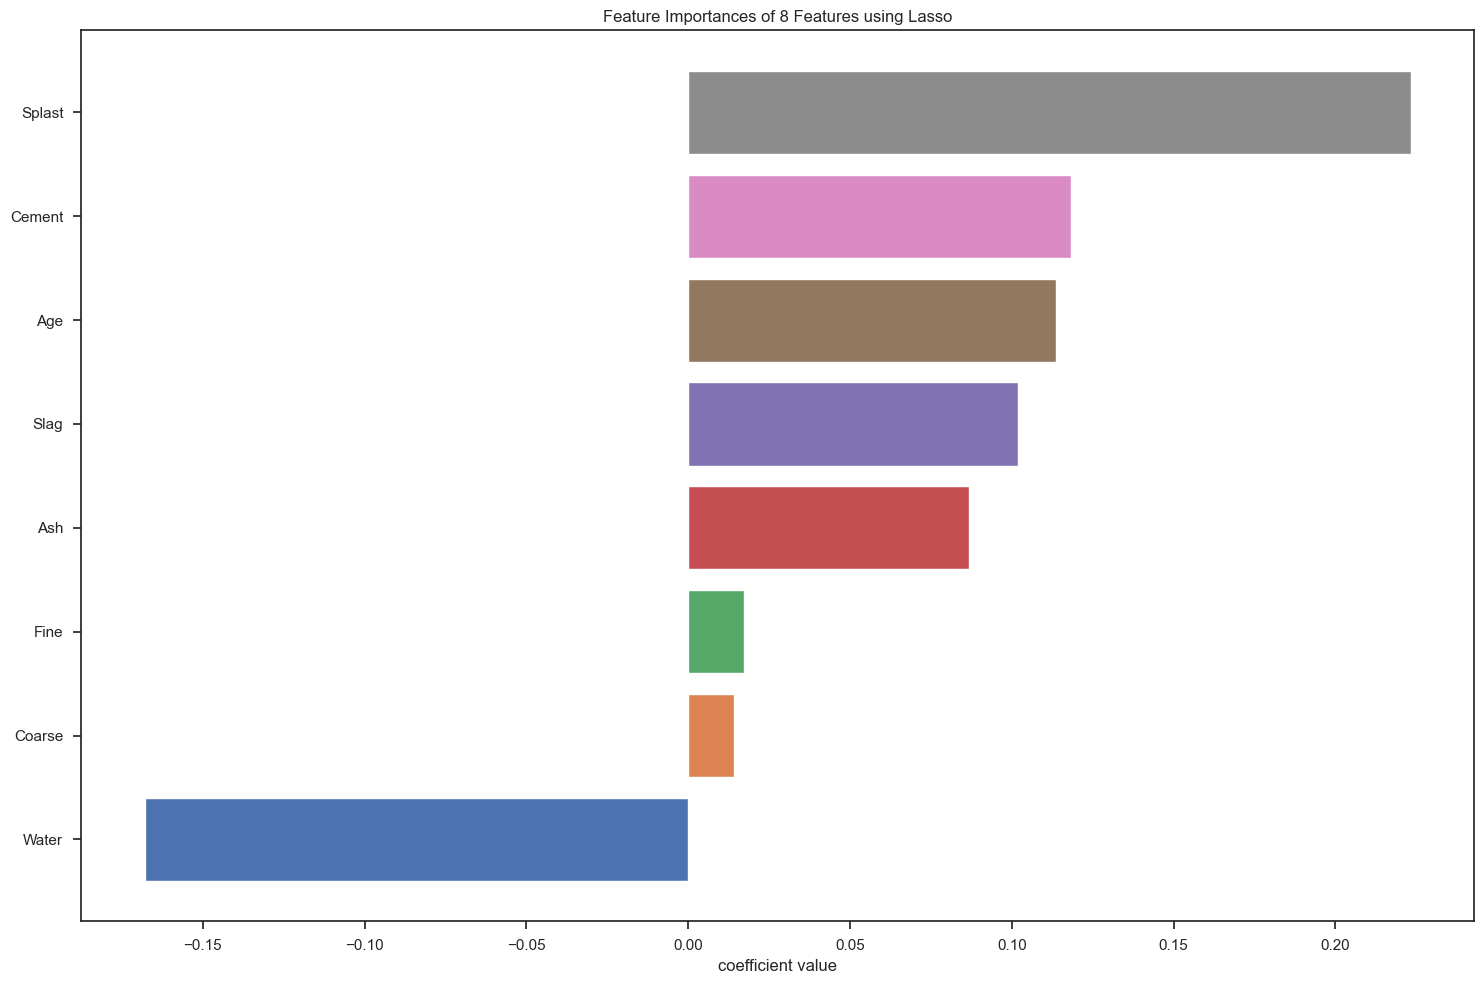

<Axes: title={'center': 'Feature Importances of 8 Features using Lasso'}, xlabel='coefficient value'>

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
labels = list(map(lambda s: s.title(),X))
v = FeatureImportances(Lasso(),ax=ax,labels=labels,relative=False)
v.fit(X,y)
v.poof()

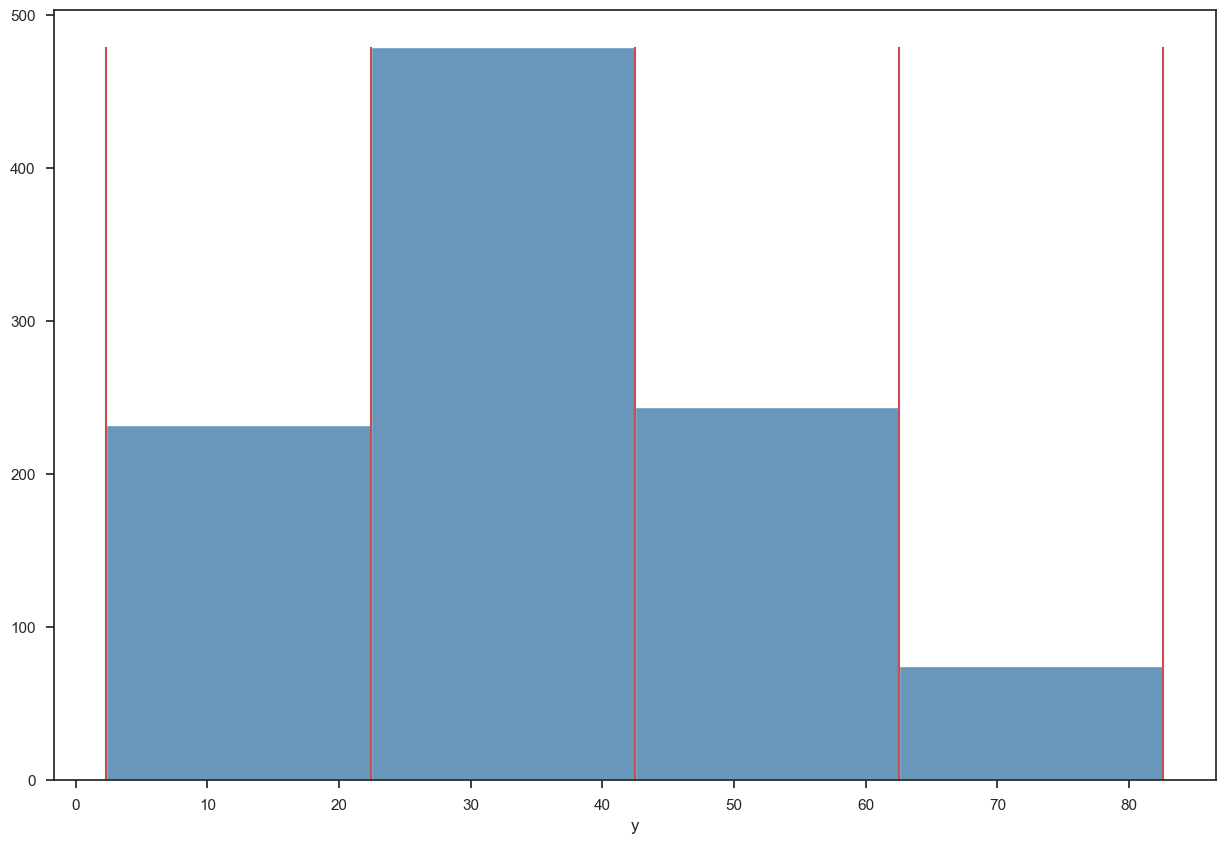

<Axes: xlabel='y'>

In [14]:
v = BalancedBinningReference()
v.fit(y)
v.poof()

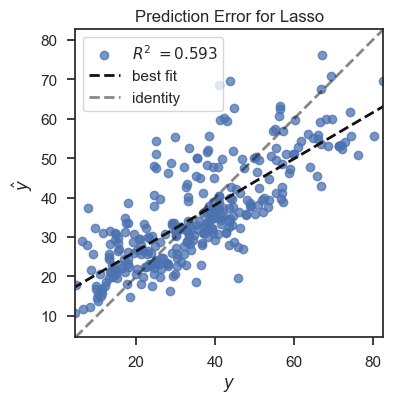

In [15]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3)
v = PredictionError(Lasso(),size=(600,400))
v.fit(X_train,y_train)
v.score(X_test,y_test)
v.finalize()

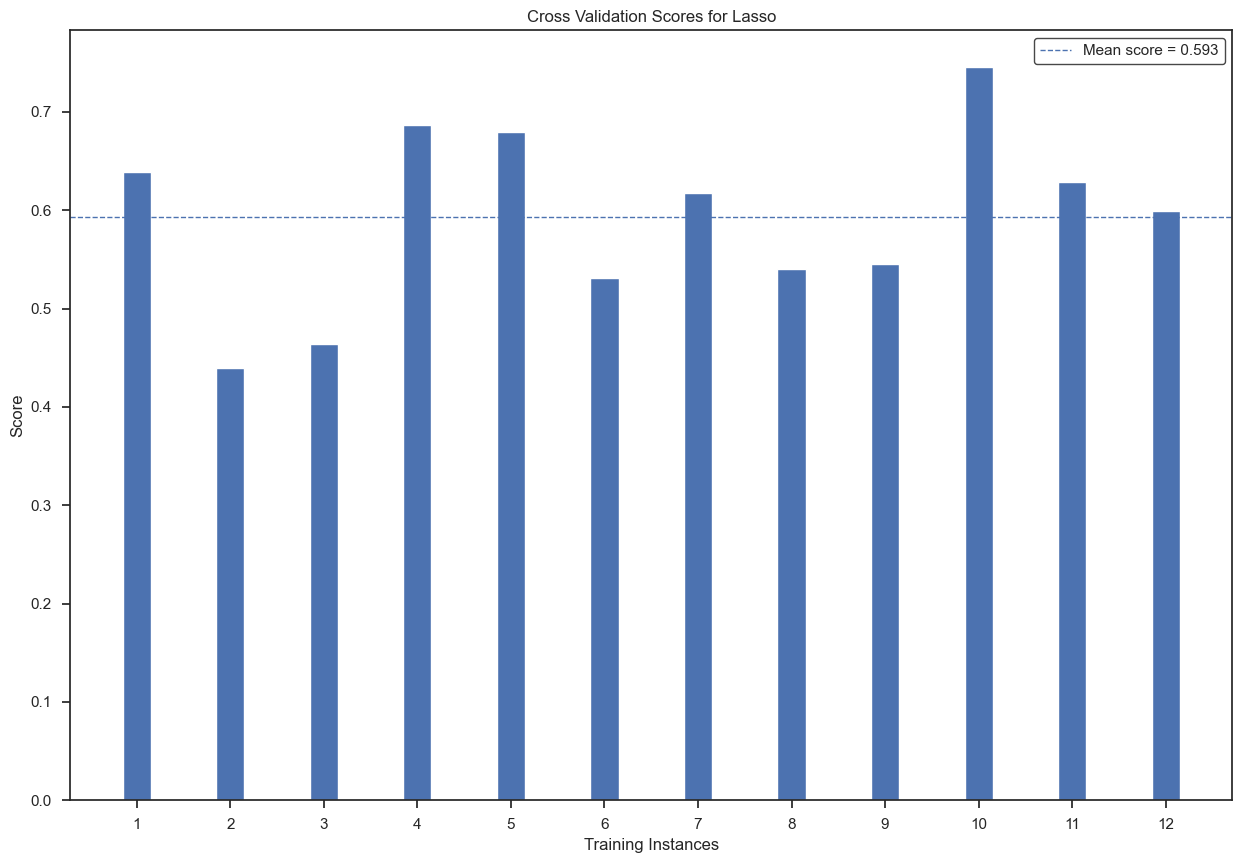

<Axes: title={'center': 'Cross Validation Scores for Lasso'}, xlabel='Training Instances', ylabel='Score'>

In [16]:
_,ax = plt.subplots()
cv = KFold(12)
v = CVScores(Lasso(),ax=ax,cv=cv,scoring='r2')
v.fit(X_train,y_train).poof()

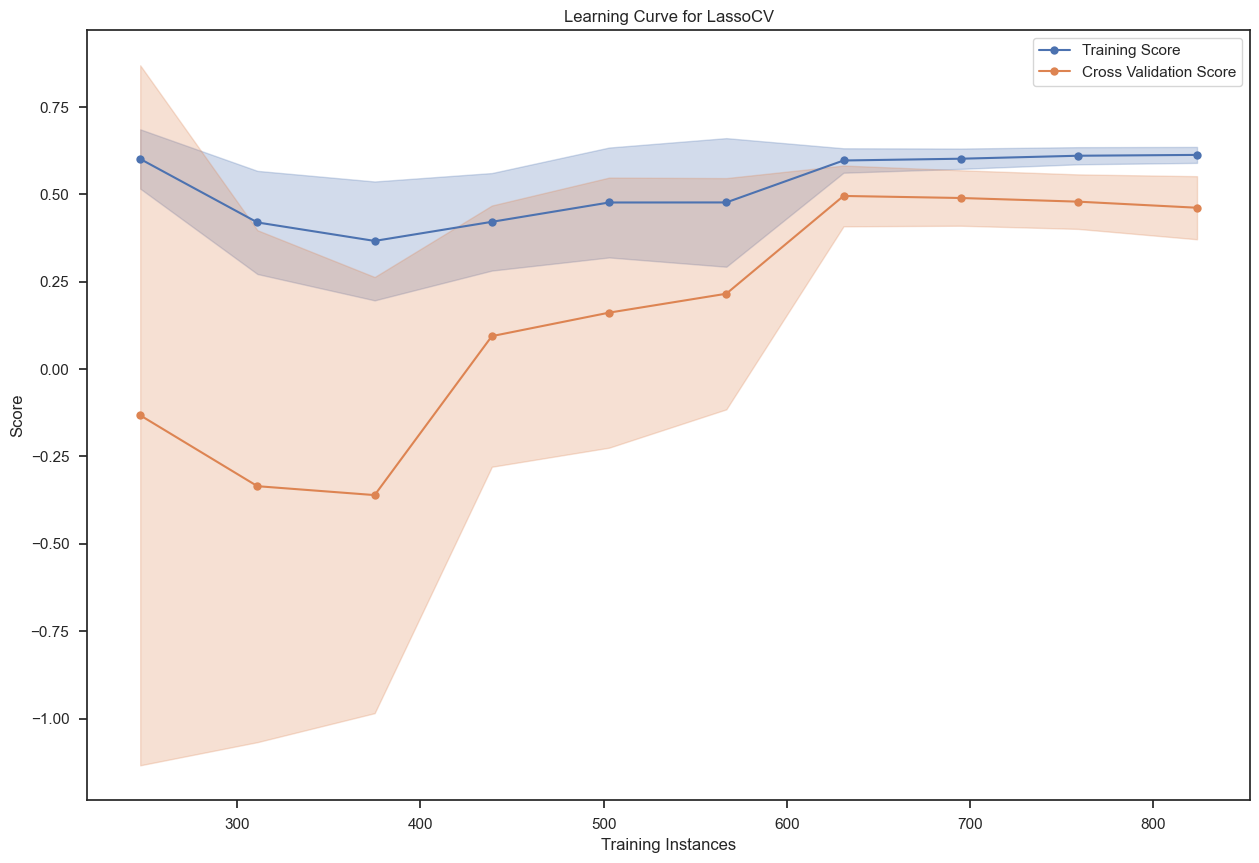

<Axes: title={'center': 'Learning Curve for LassoCV'}, xlabel='Training Instances', ylabel='Score'>

In [17]:
s = np.linspace(0.3,1.0,10)
v=LearningCurve(LassoCV(),train_sizes=s,scoring='r2')
v.fit(X,y).poof()